# Holt Linear Or Double  Exponential Smoothing -- DES

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [11]:
data=pd.read_csv(r"C:\Users\durge\Downloads\stock_daily.csv")
data.head()

,value
0,253.985
1,228.635
2,277.345
3,261.555
4,264.005


In [12]:
data['date'] = pd.date_range(start='1/1/2023', periods=len(data), freq='D')
data

,value,date
0,253.985,2023-01-01
1,228.635,2023-01-02
2,277.345,2023-01-03
3,261.555,2023-01-04
4,264.005,2023-01-05
...,...,...
195,1046.175,2023-07-15
196,1011.050,2023-07-16
197,1084.795,2023-07-17
198,898.945,2023-07-18


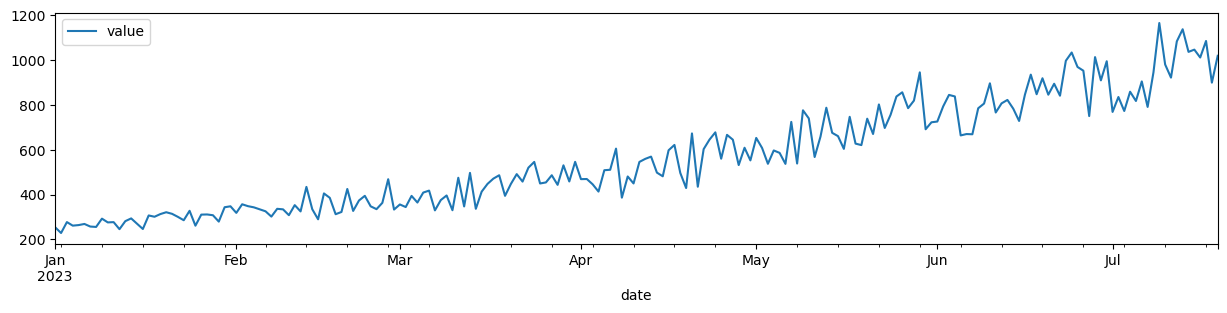

In [13]:
data.plot.line(x = 'date',y = 'value',figsize=(15,3))
plt.show() # pattern = Trend - upward

In [15]:
data2 = data.set_index("date")
data2.head()

,value
date,
2023-01-01,253.985
2023-01-02,228.635
2023-01-03,277.345
2023-01-04,261.555
2023-01-05,264.005


# Auto model 

In [16]:
data=data.set_index("date")
data.head()

,value
date,
2023-01-01,253.985
2023-01-02,228.635
2023-01-03,277.345
2023-01-04,261.555
2023-01-05,264.005


In [17]:
fit_auto = Holt(data).fit(optimized=True) # lets software decide 
fit_auto.params

C:\Users\durge\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.3022891056747599,
 'smoothing_trend': 0.07669198955232573,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 253.985,
 'initial_trend': -25.350000000000023,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [18]:
data["Forecast"] = fit_auto.fittedvalues
data.head()

,value,Forecast
date,,
2023-01-01,253.985,228.635000
2023-01-02,228.635,211.535722
2023-01-03,277.345,192.338755
2023-01-04,261.555,195.640038
2023-01-05,264.005,194.698350


### Plot
plt.plot(data.value)
plt.plot(data.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

#### Accuracy of Model

In [23]:
mean_absolute_percentage_error = np.mean(np.abs(data.value - data.Forecast)/np.abs(data.value))*100
mean_absolute_percentage_error

10.864428546909071

#### Forecast Value & Plot 

In [27]:
Forecast = round(fit_auto.forecast(10),0)
Forecast

2023-07-20    1032.0
2023-07-21    1037.0
2023-07-22    1043.0
2023-07-23    1048.0
2023-07-24    1054.0
2023-07-25    1059.0
2023-07-26    1065.0
2023-07-27    1070.0
2023-07-28    1076.0
2023-07-29    1081.0
Freq: D, dtype: float64

In [28]:
model = Holt(data2,initial_level=302,initial_trend=30,initialization_method='known').fit(
        smoothing_level=0.8,smoothing_trend=0.3,optimized=False,remove_bias=False,method='ls')
model.params

C:\Users\durge\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.8,
 'smoothing_trend': 0.3,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 302.0,
 'initial_trend': 30.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

<Axes: xlabel='date'>

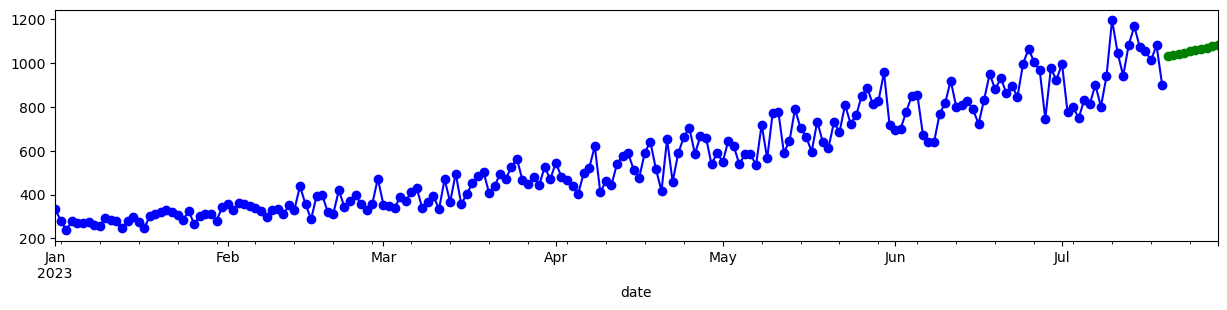

In [30]:
# plot
Forecast.plot(marker='o', color='green')
model.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

#### Auto model is Best Model 